In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses = cv2.imread('Computer-Vision-with-Python/DATA/reeses_puffs.png',0)     

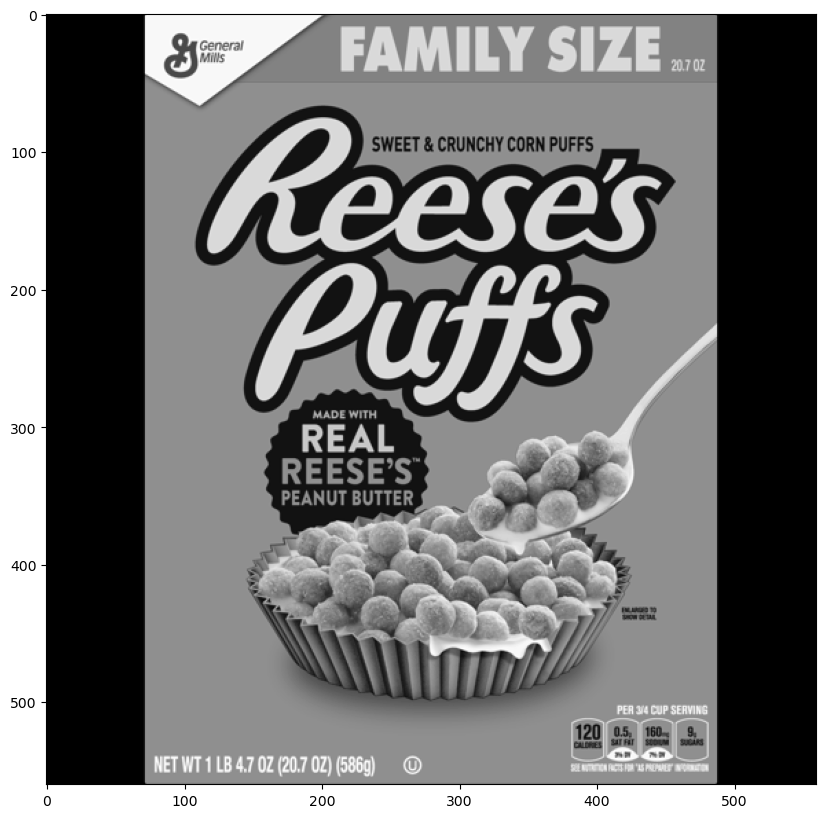

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('Computer-Vision-with-Python/DATA/many_cereals.jpg',0)

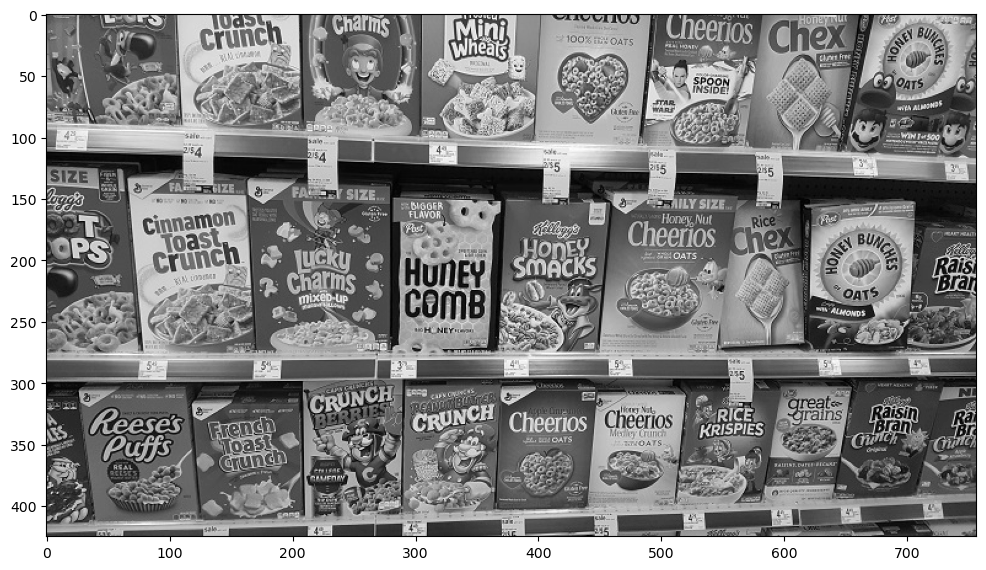

In [6]:
display(cereals)

In [7]:
# Brute Force Detection with ORB Descriptors
orb = cv2.ORB_create()

In [8]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [10]:
matches = bf.match(des1,des2)

In [11]:
# # matches
# single_match = matches[0]
# single_match.distance
# len(matches)

In [12]:
matches = sorted(matches,key=lambda x:x.distance)

In [13]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

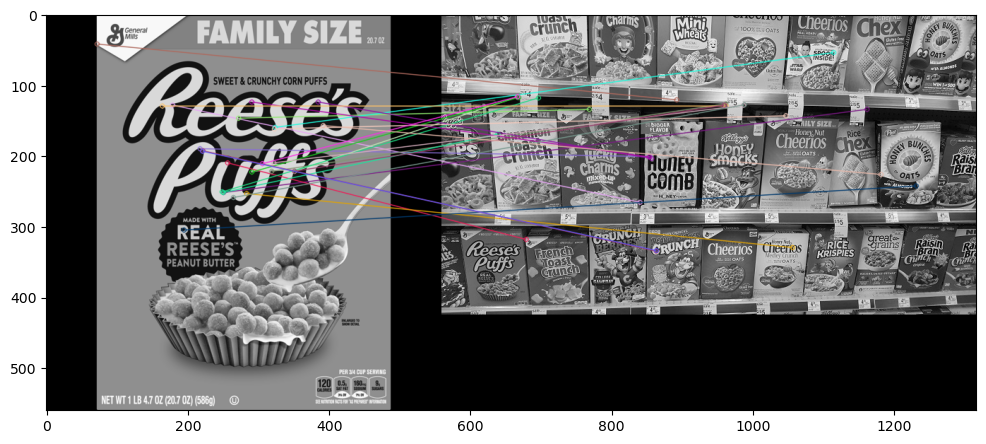

In [14]:
display(reeses_matches)

In [15]:
# Brute-Force Matching with SIFT Descriptors and Ratio Test

In [16]:
sift = cv2.xfeatures2d.SIFT_create()

In [17]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [18]:
bf = cv2.BFMatcher()

In [19]:
matches = bf.knnMatch(des1,des2,k=2)

In [27]:
# matches

In [21]:
good = []
# Less distance == better match
# Ratio match1 < 75% match2
for match1,match2 in matches:
    # If match1 distance is less than 75% of match2 distance therefore its a good match
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [22]:
len(good)

79

In [23]:
len(matches)

1501

In [24]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

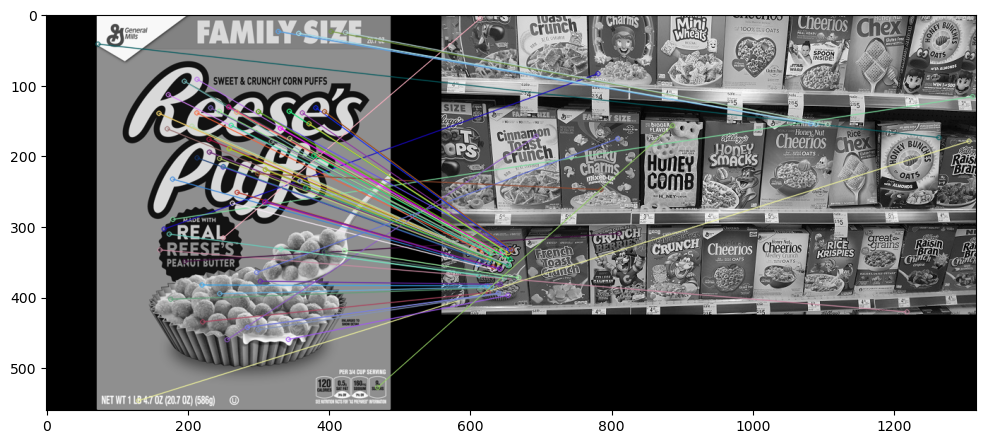

In [25]:
display(sift_matches)

In [37]:
# FLANN based Matcher
sift = cv2.xfeatures2d.SIFT_create()

In [38]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [39]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  # or {'checks':50}

In [40]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [42]:
matches = flann.knnMatch(des1,des2,k=2)

In [43]:
matchesMask = [[0,0] for i in range(len(matches))]

In [45]:
for i, (match1,match2) in enumerate (matches):
    if match1.distance < 0.75*match2.distance:
      matchesMask[i] = [1,0]

In [47]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

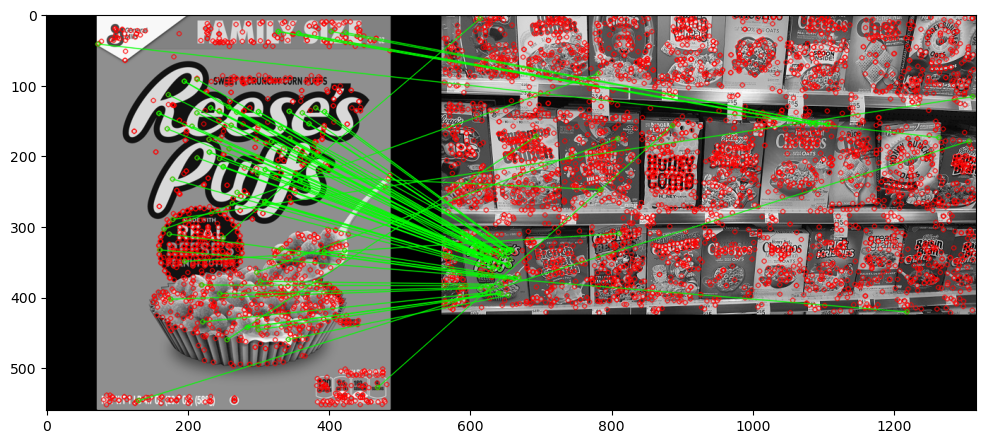

In [48]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params) # flags = 0 or 2
display(flann_matches)

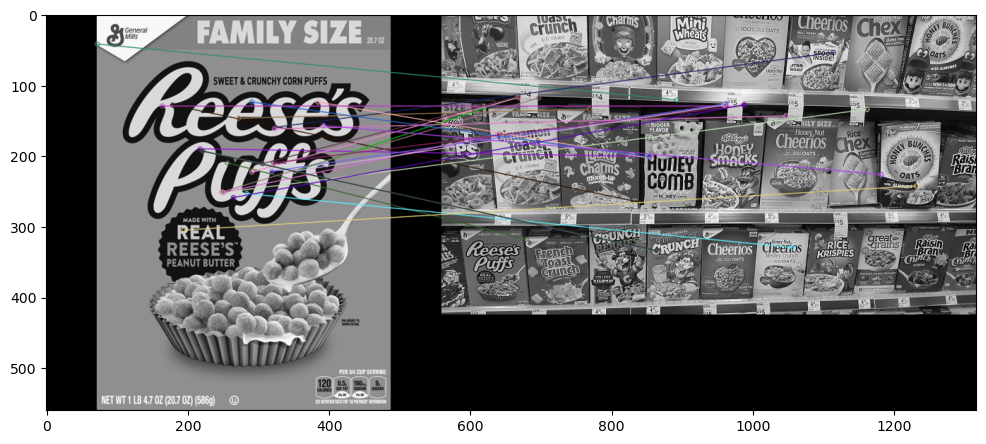

In [49]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

reeses = cv2.imread(r'C:\Users\okeiy\Downloads\Computer_Vision\Computer-Vision-with-Python\DATA\reeses_puffs.png',0)
cereals = cv2.imread(r'C:\Users\okeiy\Downloads\Computer_Vision\Computer-Vision-with-Python\DATA\many_cereals.jpg',0)

# Brute Force Detection with ORB Descriptors
orb = cv2.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches,key=lambda x:x.distance)
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_matches)